# ORgenes

In [1]:
if (!require("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}

if (!require("data.table", quietly = TRUE)) {
  install.packages("data.table")
}

if (!require("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}


In [2]:
library(ggplot2)
library(gridExtra)
library(data.table)

In [3]:
or_genes <- read.csv("data/ORgenes.csv")
or_genes[
  which(or_genes$Species == "Loxodonta Africana"),
  "Species"
] <- "Loxodonta africana"


In [4]:
write.table(
  or_genes$Species,
  "data/species.txt",
  row.names = FALSE,
  col.names = FALSE,
  quote = FALSE
)


## Five summary statistics
Determine the 5 summary statistics for Functional and non-functional OR gene numbers.

In [5]:
summary(or_genes$Functional)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  139.0   703.0   821.5   757.8   917.8  1765.0 

In [6]:
summary(or_genes$NonFuctional)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  193.0   521.5   826.0   900.1  1199.2  2646.0 

## Normality test
Run a test for normality to see if functional and on-functional OR numbers are normally distributed.

In [7]:
shapiro.test(or_genes$Functional)


	Shapiro-Wilk normality test

data:  or_genes$Functional
W = 0.89311, p-value = 2.523e-06


In [8]:
shapiro.test(or_genes$NonFuctional)


	Shapiro-Wilk normality test

data:  or_genes$NonFuctional
W = 0.90202, p-value = 6.178e-06


Both have p-value less than 0.05, so they are not normally distributed.

## Clustering analysis
Cluster your data for functional and non-functional OR numbers independently to see if there is a clear clustering pattern based on your activity pattern. Clustering can be k-means or PCA.

Saving 7 x 7 in image


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


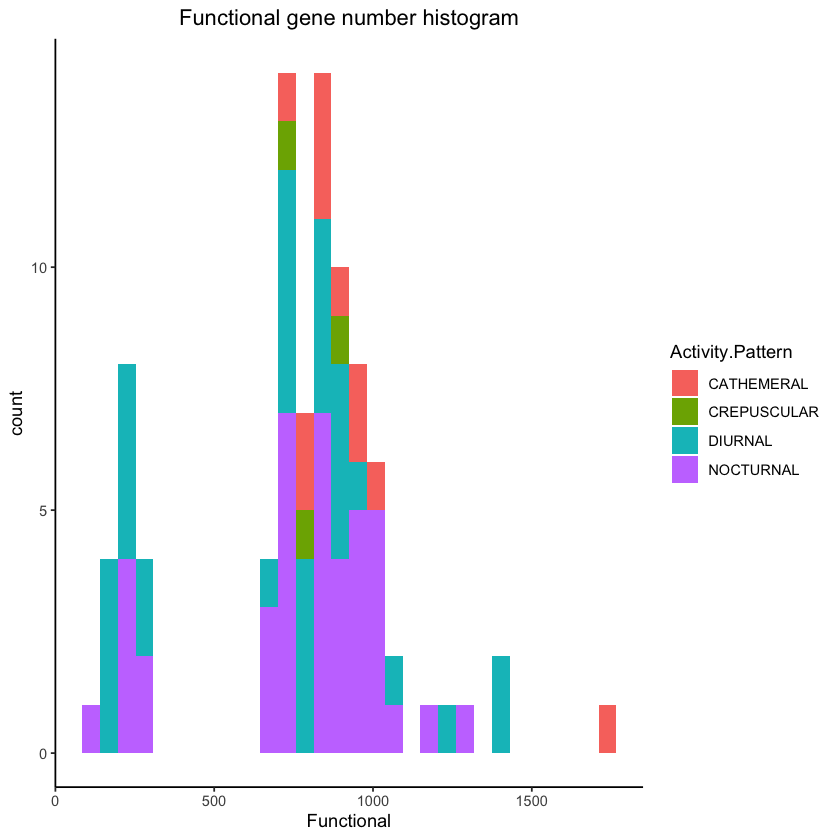

In [9]:
p <- ggplot(or_genes, aes(Functional, fill = Activity.Pattern)) +
  geom_histogram(position = "stack") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("Functional gene number histogram")

ggsave("plots/func_gene_hist.png")
p


Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


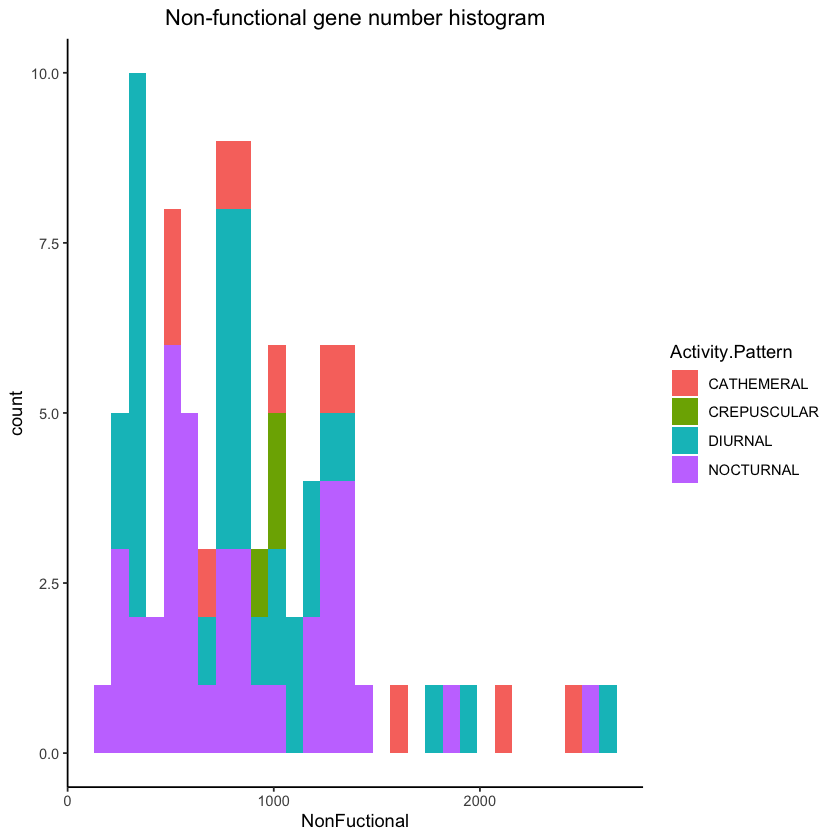

In [10]:
p <- ggplot(or_genes, aes(NonFuctional, fill = Activity.Pattern)) +
  geom_histogram(position = "stack") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("Non-functional gene number histogram")

ggsave("plots/non_func_gene_hist.png")
p

In [11]:
set.seed(12345)

run_kmeans <- function(or_genes, n_cluster, gene_type) {
  cluster_res <- kmeans(or_genes[, gene_type], n_cluster)
  res <- cbind(
    or_genes,
    paste0("cluster_", as.character(cluster_res$cluster))
  )
  colnames(res) <- c(colnames(or_genes), "Cluster")
  return(res)
}

plot_kmeans_result <- function(clustered_or_genes) {
  df <- table(clustered_or_genes[, c("Activity.Pattern", "Cluster")])
  df <- as.data.frame(df)
  heatmap_plot <- ggplot(df, aes(
    Cluster,
    Activity.Pattern,
    fill = Freq
  )) +
    geom_tile() +
    geom_text(aes(label = Freq)) +
    scale_fill_gradient(low = "white", high = "red")
  bar_plot <- ggplot(df, aes(Activity.Pattern, Freq, fill = Cluster)) +
    geom_bar(stat = "identity") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5))
  p <- bar_plot
  return(p)
}


Saving 7 x 7 in image


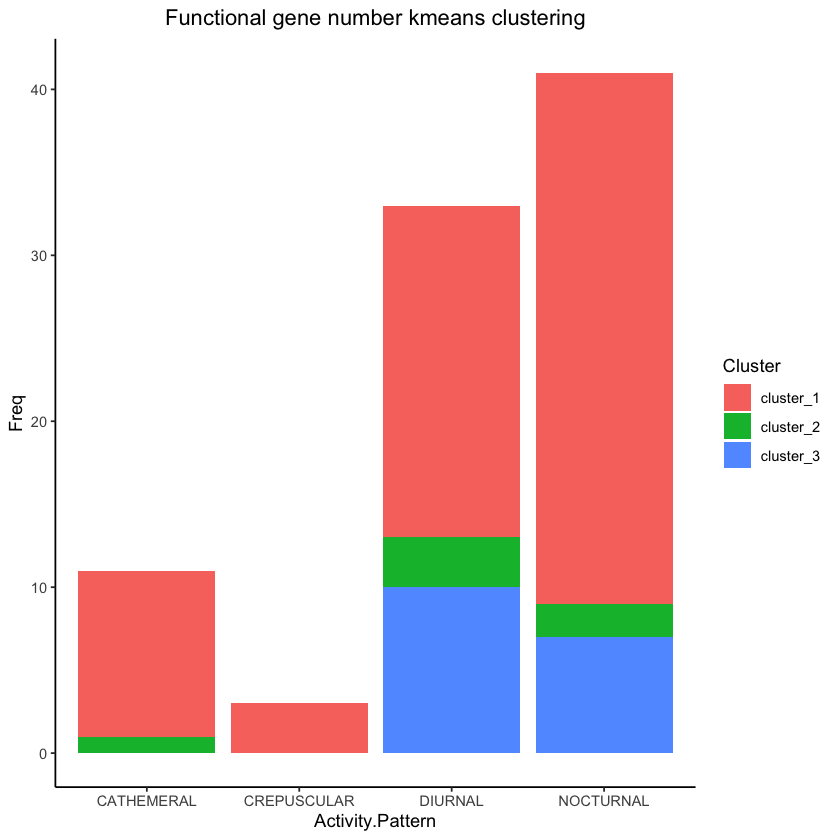

In [12]:
functional_genes <- run_kmeans(or_genes, 3, "Functional")
p <- plot_kmeans_result(functional_genes) +
  ggtitle("Functional gene number kmeans clustering")

ggsave("plots/func_gene_kmeans.png")
p

Saving 7 x 7 in image


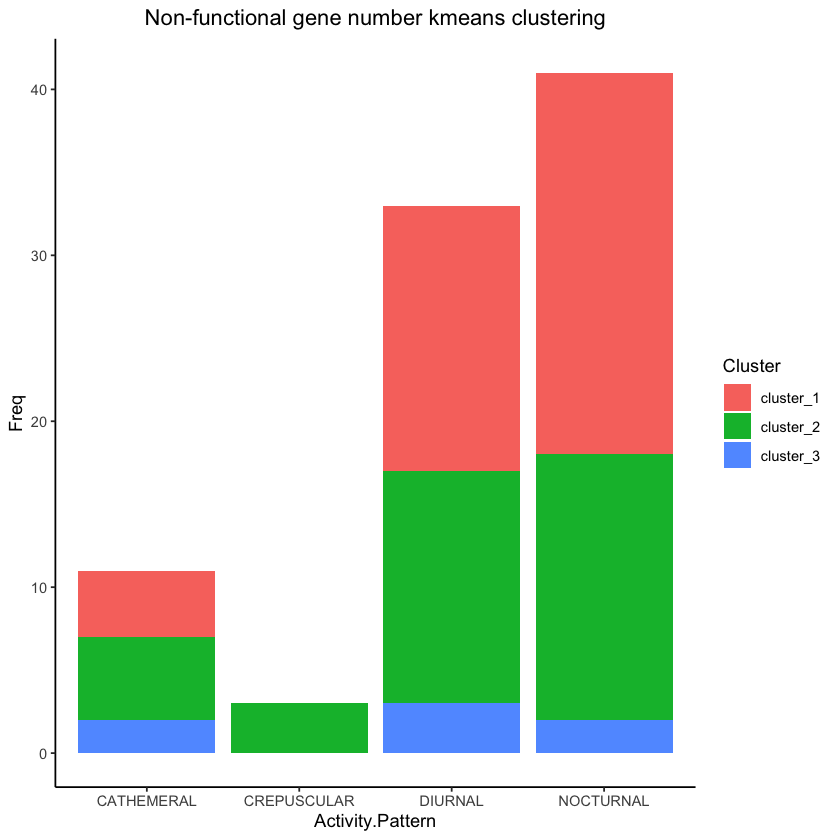

In [13]:
non_functional_genes <- run_kmeans(or_genes, 3, "NonFuctional")
p <- plot_kmeans_result(non_functional_genes) +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("Non-functional gene number kmeans clustering")

ggsave("plots/non_func_gene_kmeans.png")
p


## Correlation test
Determine if a correlation exists between both functional and non-functional OR gene numbers, based on whether your data is normal or not.

In [14]:
cor.test(or_genes$Functional, or_genes$NonFuctional, method = "spearman")

Warning message in cor.test.default(or_genes$Functional, or_genes$NonFuctional, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  or_genes$Functional and or_genes$NonFuctional
S = 35298, p-value = 1.143e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6891765 


The p-value is $1.143 * 10^{-13}$ which is less than 0.05, so there might be a correlation between functional gene and non-functional gene number

## Statistical hypothesis test
Use an appropriate hypothesis test to determine if a significant difference exists between activity patterns with respect to functional OR gene numbers.

In [15]:
normality_test <- function(or_genes, gene_type) {
  values <- or_genes[c("Activity.Pattern", gene_type)]
  values <- split(values, values$Activity.Pattern)
  res <- lapply(values, function(i) {
    shapiro.test(i[, gene_type])
  })
  return(res)
}


In [16]:
normality_test_res <- normality_test(or_genes, "Functional")
for (pat in names(normality_test_res)) {
  cat(pat, "\n")
  print(normality_test_res[[pat]])
}


CATHEMERAL 

	Shapiro-Wilk normality test

data:  i[, gene_type]
W = 0.63574, p-value = 7.12e-05

CREPUSCULAR 

	Shapiro-Wilk normality test

data:  i[, gene_type]
W = 0.82775, p-value = 0.1826

DIURNAL 

	Shapiro-Wilk normality test

data:  i[, gene_type]
W = 0.88435, p-value = 0.002143

NOCTURNAL 

	Shapiro-Wilk normality test

data:  i[, gene_type]
W = 0.87755, p-value = 0.0003847



In [17]:
kruskal.test(Activity.Pattern ~ Functional, data = or_genes)


	Kruskal-Wallis rank sum test

data:  Activity.Pattern by Functional
Kruskal-Wallis chi-squared = 82.859, df = 80, p-value = 0.3913


The p-value is 0.3913 which is greater than 0.05, so there might be no significnat difference between activity patterns with respect to functional OR gene numbers.

In [18]:
contingency_table <- table(functional_genes[c("Activity.Pattern", "Cluster")])
contingency_table
fisher.test(contingency_table)


                Cluster
Activity.Pattern cluster_1 cluster_2 cluster_3
     CATHEMERAL         10         1         0
     CREPUSCULAR         3         0         0
     DIURNAL            20         3        10
     NOCTURNAL          32         2         7


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.2659
alternative hypothesis: two.sided
